![title](titanic.png)

## 📚 Importing Libraries 📚

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
from sklearn.svm import SVC

## ⏳ Exploring Dataset ⏳

In [185]:
data=pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🧠 Understanding Data 🧠

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [187]:
data.shape

(891, 12)

In [188]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [189]:
data.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [190]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

******************************************************************************************************************
PassengerId : Id number of passengers

Pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survival: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target

Name: A field rich in information as it contains title and family names

Sex: male/female

Age: Age, asignificant portion of values aremissing

Sibsp: Number of siblings/spouses aboard

Parch: Number of parents/children aboard

Ticket: Ticket number

Fare: Passenger fare (British Pound)

Cabin: Does the location of the cabin influence chances of survival?

Embarked: Port of onboarding (C = Cherbourg; Q = Queens
town; S = Southampton)

## 🧹 Data Cleaning 🧹

In [191]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 null values in 'Age' column, 687 in 'Cabin' column and 1 in 'Fare Column

In [192]:
# Calculate null value percentage
null_percent_age = (data['Age'].isnull().sum()/data['Age'].shape[0]) * 100
null_percent_cabin = (data['Cabin'].isnull().sum()/data['Cabin'].shape[0]) * 100

print("Percentage of Null values in Age column is {}".format(null_percent_age))
print("Percentage of Null values in Cabin column is {}".format(null_percent_cabin))

Percentage of Null values in Age column is 19.865319865319865
Percentage of Null values in Cabin column is 77.10437710437711


As we can see that Cabin column have 77% of Null Data. So, we can remove this column.

Age column has 19.8% Null Data. So, we will repace the null values in age column with Median.

We will delete the 2  ros which consist Null value in Embarked column.

In [193]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [194]:
data.drop(index = 61, inplace = True)
data.drop(index = 829, inplace = True)

In [195]:
data.shape

(889, 12)

In [196]:
data.drop('Cabin', axis = 1, inplace = True)

In [197]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [198]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [199]:
data.duplicated().sum()

0

#  📊 Data Visualization 📊

##  Univariate Analysis

### ** Gender **

In [200]:
sex_counts=data['Sex'].value_counts()
sex_counts

Sex
male      577
female    312
Name: count, dtype: int64

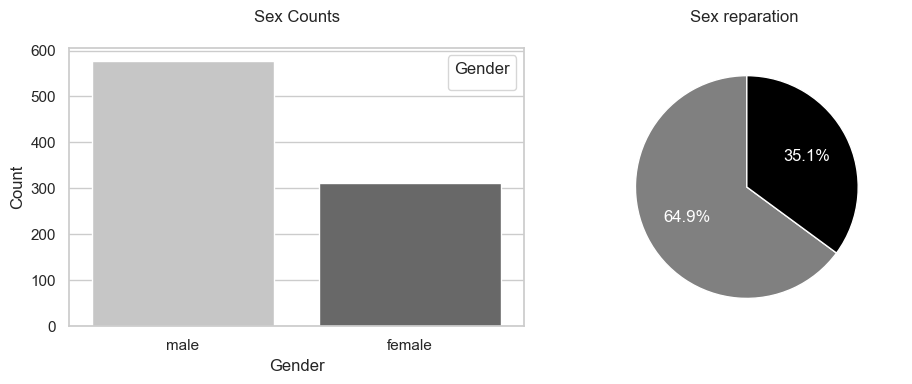

In [201]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='Greys')
plt.legend(sex_counts, ['male', 'female'], title = 'Gender')
plt.title('Sex Counts\n')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['gray', 'black'], startangle=90,textprops={'color': 'white'})
plt.title('Sex reparation \n')
plt.tight_layout()
plt.show()

### ** Age ** 

In [76]:
age_counts=data['Age'].value_counts()
age_counts

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

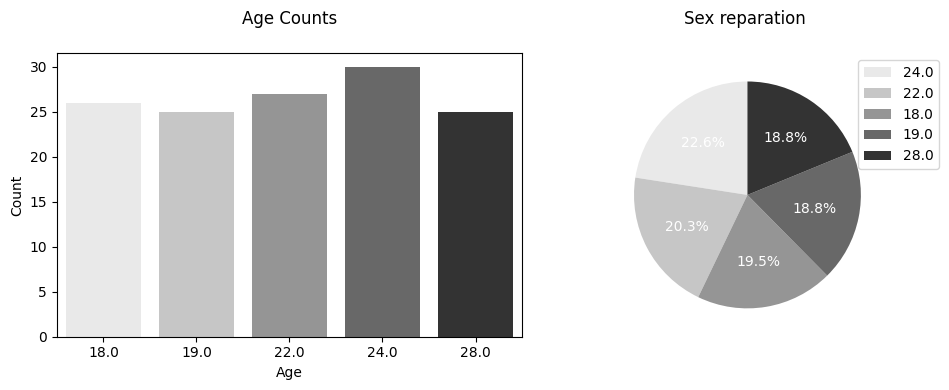

In [93]:
age_counts=data['Age'].value_counts().head()
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=age_counts.index, y=age_counts.values, palette='Greys')
plt.title('Age Counts\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
gray_shades = sns.color_palette('Greys', n_colors=len(age_counts))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors=gray_shades, startangle=90, textprops={'color': 'white'})
plt.title('Sex reparation \n')
plt.tight_layout()
plt.legend(labels=age_counts.index, loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

### ** Pclass ** 

In [53]:
pclass_counts=data['Pclass'].value_counts()
pclass_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

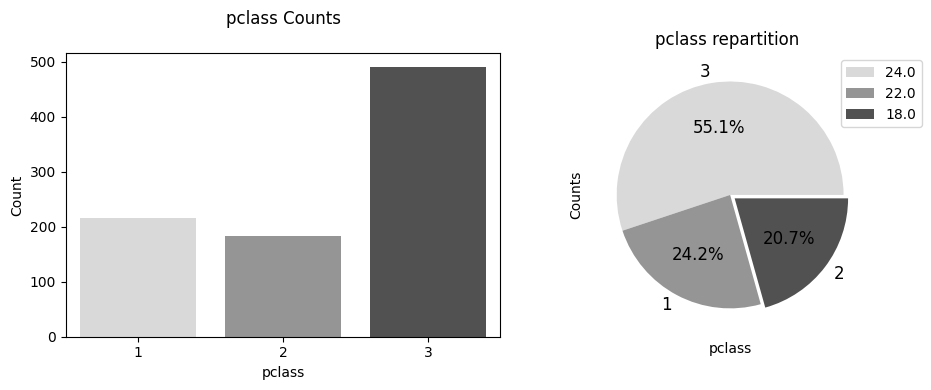

In [103]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=pclass_counts.index, y=pclass_counts.values, palette='Greys')
plt.title('pclass Counts\n')
plt.xlabel('pclass')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
gray_palette = sns.color_palette('Greys', n_colors=len(pclass_counts))
explode = (0, 0, 0.05)
pclass_counts.plot(kind='pie', fontsize=12, explode=explode, autopct='%.1f%%', colors=gray_palette)
plt.title('pclass repartition ')
plt.xlabel('pclass')
plt.ylabel('Counts')
plt.legend(labels=age_counts.index, loc="upper right", bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

### ** Family Members **

In [105]:
SibSp_counts=data['SibSp'].value_counts()
SibSp_counts

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

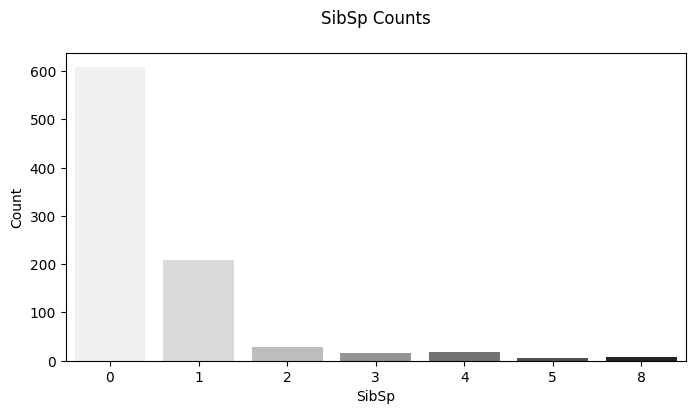

In [111]:
plt.figure(figsize=(8, 4))
sns.barplot(x=SibSp_counts.index, y=SibSp_counts.values, palette='Greys')
plt.title('SibSp Counts\n')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

### ** Parch ** 

In [112]:
Parch_counts=data['Parch'].value_counts()
Parch_counts

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

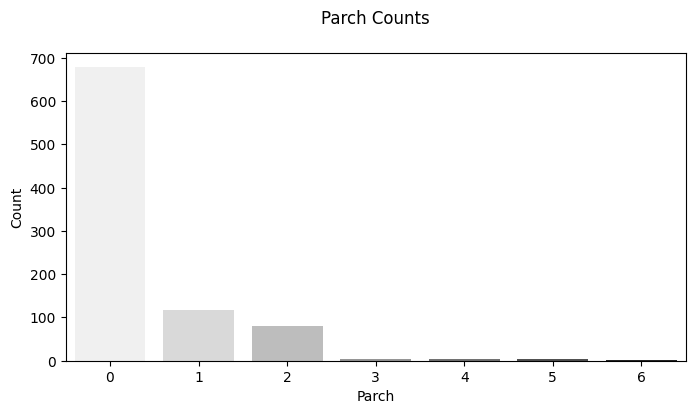

In [114]:
plt.figure(figsize=(8, 4))
sns.barplot(x=Parch_counts.index, y=Parch_counts.values, palette='Greys')
plt.title('Parch Counts\n')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()

### ** Embarked ** 

In [116]:
Embarked_counts=data['Embarked'].value_counts()
Embarked_counts

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

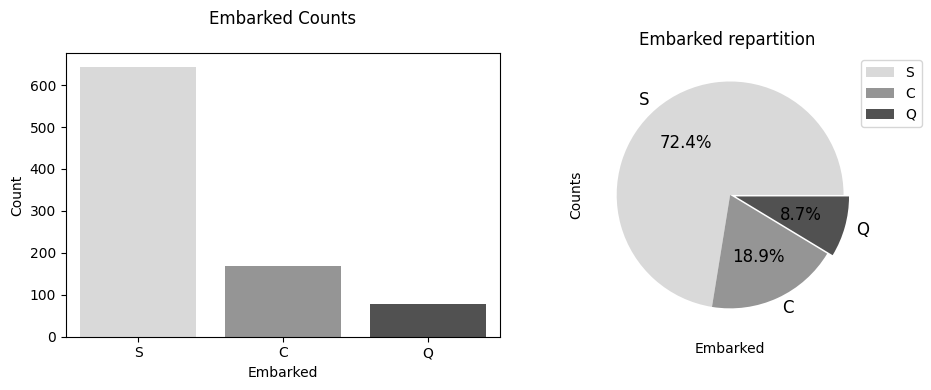

In [118]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=Embarked_counts.index, y=Embarked_counts.values, palette='Greys')
plt.title('Embarked Counts\n')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
gray_palette = sns.color_palette('Greys', n_colors=len(Embarked_counts))
explode = (0, 0, 0.05)
Embarked_counts.plot(kind='pie', fontsize=12, explode=explode, autopct='%.1f%%', colors=gray_palette)
plt.title('Embarked repartition ')
plt.xlabel('Embarked')
plt.ylabel('Counts')
plt.legend(labels=Embarked_counts.index, loc="upper right", bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

### ** Survived **

In [119]:
Survived_counts=data['Survived'].value_counts()
Survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

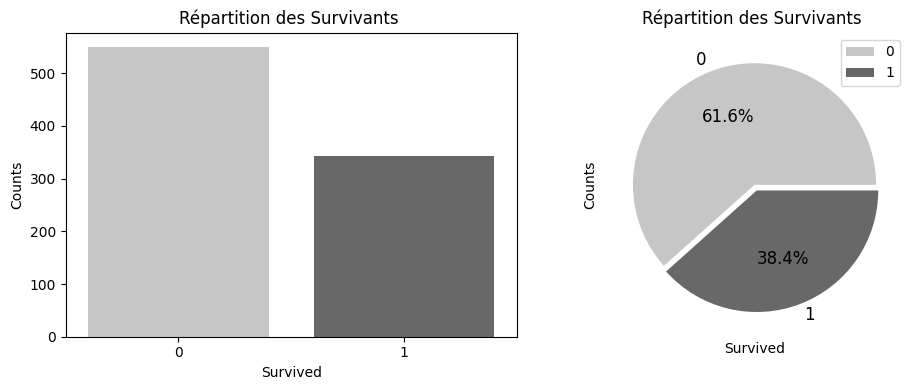

In [132]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=Survived_counts.index, y=Survived_counts.values, palette='Greys')
plt.title('Répartition des Survivants ')
plt.xlabel('Survived')
plt.ylabel('Counts')
plt.subplot(1, 2, 2)
gray_palette = sns.color_palette('Greys', n_colors=len(Survived_counts))
explode = (0, 0.05)
Survived_counts.plot(kind='pie', fontsize=12, explode=explode, autopct='%.1f%%', colors=gray_palette)
plt.title('Répartition des Survivants ')
plt.xlabel('Survived')
plt.ylabel('Counts')
plt.legend(labels=Survived_counts.index, loc="best")
plt.tight_layout()
plt.show()

## Bivariate Analysis

### visulize age ,gender, sibsp, parch , pclass are survived or not

<Figure size 1500x800 with 0 Axes>

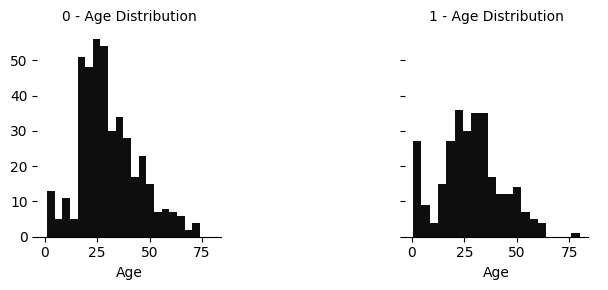

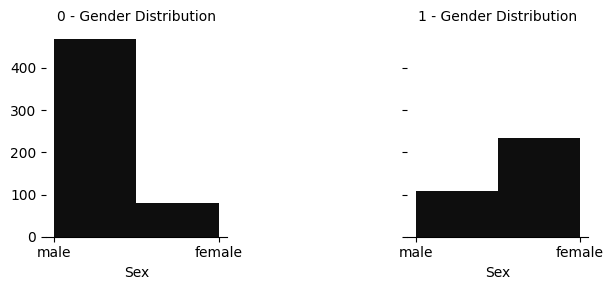

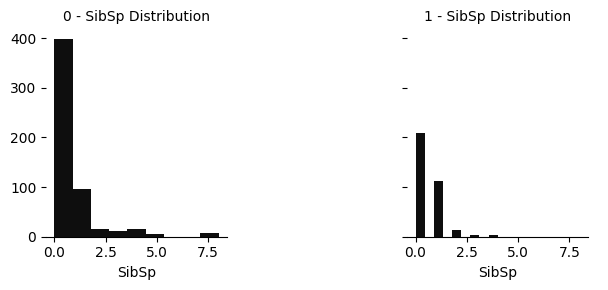

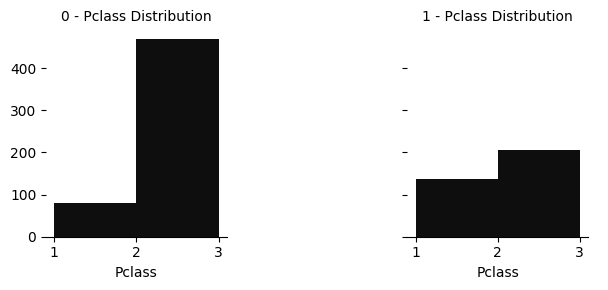

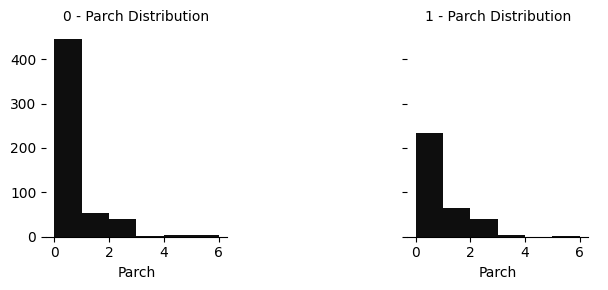

In [160]:
gray_palette = sns.color_palette('Greys', n_colors=20)

# Créer un FacetGrid pour l'âge par rapport à la survie
plt.figure(figsize=(15, 8))
age = sns.FacetGrid(data, col='Survived')
age.map(plt.hist, 'Age', bins=20, color=gray_palette[-1])
age.despine(left=True, right=True)
plt.subplots_adjust(wspace=1)
age.add_legend()
age.set_titles(col_template="{col_name} - Age Distribution")

# Créer un FacetGrid pour le genre par rapport à la survie
gender = sns.FacetGrid(data, col='Survived')
gender.map(plt.hist, 'Sex', bins=2, color=gray_palette[-1])
gender.despine(left=True, right=True)
plt.subplots_adjust(wspace=1)
gender.add_legend()
gender.set_titles(col_template="{col_name} - Gender Distribution")

# Créer un FacetGrid pour 'SibSp' par rapport à la survie
sibsp = sns.FacetGrid(data, col='Survived')
sibsp.map(plt.hist, 'SibSp', bins=9, color=gray_palette[-1])
sibsp.despine(left=True, right=True)
plt.subplots_adjust(wspace=1)
sibsp.add_legend()
sibsp.set_titles(col_template="{col_name} - SibSp Distribution")

# Créer un FacetGrid pour 'Pclass' par rapport à la survie
pclass = sns.FacetGrid(data, col='Survived')
pclass.map(plt.hist, 'Pclass', bins=[1, 2, 3], color=gray_palette[-1])
pclass.despine(left=True, right=True)
plt.subplots_adjust(wspace=1)
pclass.add_legend()
pclass.set_titles(col_template="{col_name} - Pclass Distribution")

# Créer un FacetGrid pour 'Parch' par rapport à la survie
parch = sns.FacetGrid(data, col='Survived')
parch.map(plt.hist, 'Parch', bins=sorted(Parch_counts.index), color=gray_palette[-1])
parch.despine(left=True, right=True)
plt.subplots_adjust(wspace=1)
parch.add_legend()
parch.set_titles(col_template="{col_name} - Parch Distribution")

plt.show()

## ⚙️ Data Preprocessing ⚙️

In Data Preprocessing, we will perorm:

1. Check for outliers
2. Check correlation
3. Split data in train and test
4. Apply standard scalingma_,maxima_)

In [202]:
df_new = data.copy(deep = True)

In [203]:
def outliers_box(d_f, col_):
    try:
        q1 = np.quantile(d_f[col_], 0.25)
        q2 = np.quantile(d_f[col_], 0.75)
        iqr = q2 - q1
        maxima_ = q2 + 1.5 * iqr
        minima_ = q1 - 1.5 * iqr

        if (d_f[col_].max() > maxima_) or (d_f[col_].min() < minima_):
            print(col_, '------- outliers present')
        else:
            print(col_, '------- outliers not present')

        return minima_, maxima_
    except Exception as e:
        print(f"Error in outliers_box for column {col_}: {e}")
        return None

In [204]:
def out_remove(d_f, col_):
    x1, y1 = outliers_box(d_f, col_)
    # Créer une copie du DataFrame
    df_copy = d_f.copy()
    # Supprimer les lignes contenant des outliers
    df_copy.drop(index=df_copy[(df_copy[col_] < x1) | (df_copy[col_] > y1)].index, axis=0, inplace=True)
    return df_copy

In [205]:
for i in df_new.columns:
    # Convertir la colonne en type numérique
    df_new[i] = pd.to_numeric(df_new[i], errors='coerce')
    # Vérifier et supprimer les outliers
    df_new = out_remove(df_new, i)
    df_new.reset_index(drop=True, inplace=True)

PassengerId ------- outliers not present
Survived ------- outliers not present
Pclass ------- outliers not present
Name ------- outliers not present
Sex ------- outliers not present
Age ------- outliers present
SibSp ------- outliers present
Parch ------- outliers present
Ticket ------- outliers not present
Fare ------- outliers present
Embarked ------- outliers not present


In [206]:
data.shape

(889, 11)

In [207]:
df_new.shape

(561, 11)

Here, we can see that there are some outliers in the 'Age' and  'SibSp' ,'Parch' , 'Fare' columns.

After removing the outliers, 328 rows were deleted.

But, as we have a low amount of data and  the columns  are important for modeling. We will not remove outliers.

In [208]:
data=data.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [209]:
# convertir le gender en 0 et 1
data['Sex']=data['Sex'].replace({'male':1,'female':0})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [210]:
# Remplissez les valeurs manquantes dans la colonne âge en imputant la médiane
data['Age'].fillna(data['Age'].median(), inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [211]:
# Remplissez les valeurs manquantes dans la colonne embarked en imputant le mode
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [212]:
data['Embarked']=data['Embarked'].replace({'S':1,'C':2,'Q':3})
data.head(200)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
196,0,3,1,28.0,0,0,7.7500,3
197,0,3,1,42.0,0,1,8.4042,1
198,1,3,0,28.0,0,0,7.7500,3
199,0,2,0,24.0,0,0,13.0000,1


In [213]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.069822,-0.034040,0.083151,0.255290,0.108669
Pclass,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,0.043835
Sex,-0.541585,0.127741,1.000000,0.086506,-0.116348,-0.247508,-0.179958,-0.118593
Age,-0.069822,-0.336512,0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.007165
SibSp,-0.034040,0.081656,-0.116348,-0.232543,1.000000,0.414542,0.160887,-0.060606
Parch,0.083151,0.016824,-0.247508,-0.171485,0.414542,1.000000,0.217532,-0.079320
Fare,0.255290,-0.548193,-0.179958,0.093707,0.160887,0.217532,1.000000,0.063462
Embarked,0.108669,0.043835,-0.118593,-0.007165,-0.060606,-0.079320,0.063462,1.000000


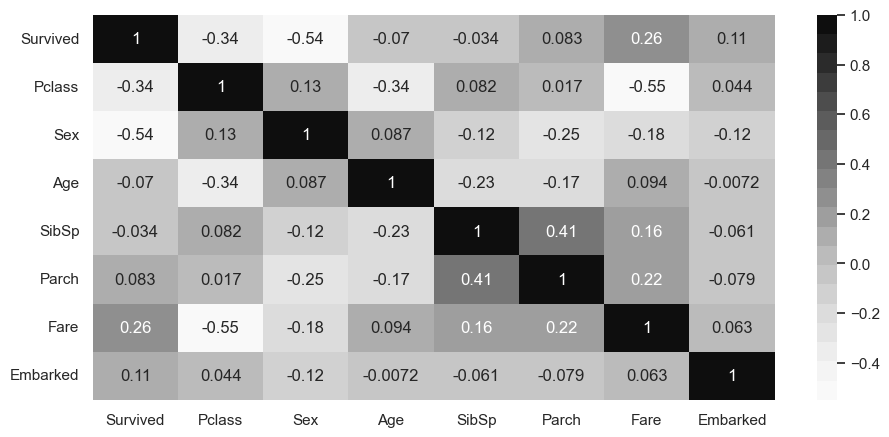

In [214]:
gray_palette = sns.color_palette('Greys', n_colors=20)
plt.figure(figsize=(11, 5))
sns.heatmap(data.corr(), annot=True, cmap=gray_palette)
plt.show()

## ✍🏻 PREPARE THE DATA FOR ALGORITHMES ✍🏻

In [215]:
X=data.drop(columns=['Survived'])
y=data['Survived']

In [216]:
y=y.values.reshape(-1,1)

#### Normalise Data (Data Scaling ) 

In [217]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

#### Split Data 

In [218]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)

## Logistic Regression 📝

In [226]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

#### Prediction dans Train 

In [121]:
y_pred_lr__train=clf.predict(X_train)
print(classification_report(y_train,y_pred_train))
score=accuracy_score(y_train,y_pred_train)
print(f'Accuracy: {round(score*100,2)}%')

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       382
           1       0.76      0.70      0.73       240

    accuracy                           0.80       622
   macro avg       0.79      0.78      0.79       622
weighted avg       0.80      0.80      0.80       622

Accuracy: 80.23%


#### Prediction dans Test

In [122]:
y_pred_lr=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[139  28]
 [ 29  71]]


In [123]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       167
           1       0.72      0.71      0.71       100

    accuracy                           0.79       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



In [125]:
score=accuracy_score(y_test,y_pred_lr)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 78.65%


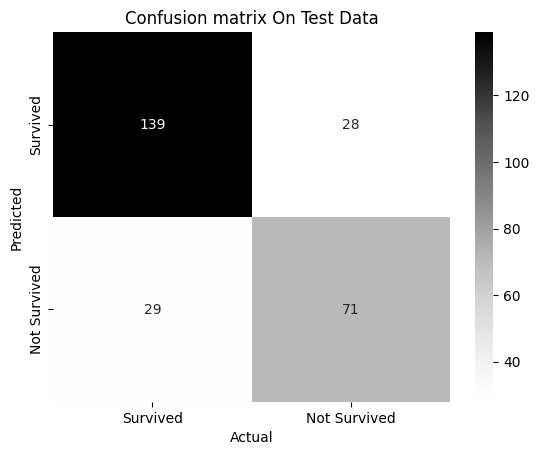

In [66]:
new_cm = pd.DataFrame(cm , index = ['Survived','Not Survived'] , columns = ['Survived','Not Survived'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Survived','Not Survived'], yticklabels = ['Survived','Not Survived'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

#### Best parametres dans Regression logistique

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs','saga']  
}
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)

Meilleurs paramètres : {'C': 0.1, 'solver': 'liblinear'}
Meilleure précision : 0.7989806451612903


## Decision tree 📝

In [225]:
modele_arbre_decision = DecisionTreeClassifier(random_state=42)
modele_arbre_decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [120]:
y_pred_dt = modele_arbre_decision.predict(X_test)
ypred_dt_train = modele_arbre_decision.predict(X_train)

In [117]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_dt)
print(cm_nb)

[[131  36]
 [ 28  72]]


In [118]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       167
           1       0.67      0.72      0.69       100

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.77      0.76      0.76       267



In [119]:
score_rf=accuracy_score(y_test,y_pred_dt)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 76.03%


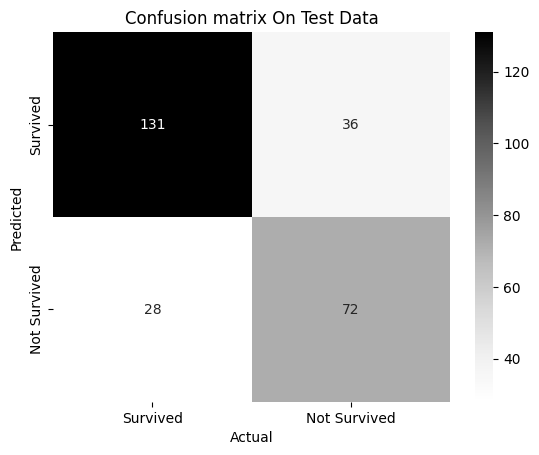

In [74]:
new_cm = pd.DataFrame(cm_nb , index = ['Survived','Not Survived'] , columns = ['Survived','Not Survived'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Survived','Not Survived'], yticklabels = ['Survived','Not Survived'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

####  Best parametres dans Decision tree

In [75]:
param_grid = {
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4] 
}
decision_tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)

Meilleurs paramètres : {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Meilleure précision : 0.8247741935483871


## KNN 📝

In [227]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [99]:
y_pred_knn = knn.predict(X_test)
ypred_knn_train = knn.predict(X_train)

In [100]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[138  29]
 [ 30  70]]


In [101]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       167
           1       0.71      0.70      0.70       100

    accuracy                           0.78       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267



In [102]:
score_rf=accuracy_score(y_test,y_pred_knn)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 77.9%


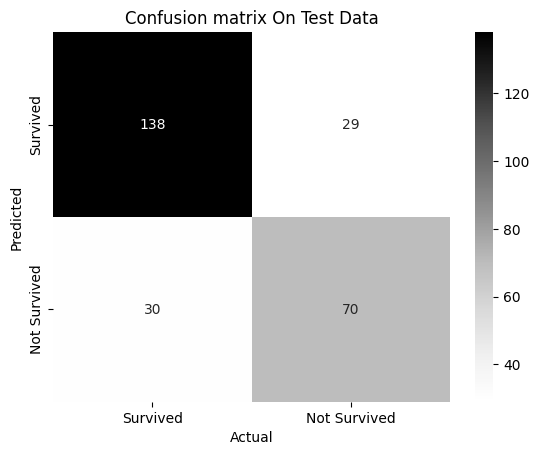

In [81]:
new_cm = pd.DataFrame(cm_knn , index = ['Survived','Not Survived'] , columns = ['Survived','Not Survived'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Survived','Not Survived'], yticklabels = ['Survived','Not Survived'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

#### Best parametres dans KNN 

In [82]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_classifier = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)
print("Meilleurs paramètres pour k-NN :", knn_grid_search.best_params_)
print("Meilleure précision pour k-NN :", knn_grid_search.best_score_)

Meilleurs paramètres pour k-NN : {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Meilleure précision pour k-NN : 0.8375483870967741


 ## XGBoost 📝

In [228]:
import xgboost as xgb
xg=xgb.XGBClassifier(objective="binary:logistic",random_state=42,n_estimators=1000, learning_rate=0.001, max_depth=7)
xg.fit(X_train, y_train,early_stopping_rounds=100, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.66126
[1]	validation_0-logloss:0.66082
[2]	validation_0-logloss:0.66039
[3]	validation_0-logloss:0.65995
[4]	validation_0-logloss:0.65952
[5]	validation_0-logloss:0.65909
[6]	validation_0-logloss:0.65866
[7]	validation_0-logloss:0.65824
[8]	validation_0-logloss:0.65782
[9]	validation_0-logloss:0.65739
[10]	validation_0-logloss:0.65697
[11]	validation_0-logloss:0.65654
[12]	validation_0-logloss:0.65612
[13]	validation_0-logloss:0.65570
[14]	validation_0-logloss:0.65528
[15]	validation_0-logloss:0.65487
[16]	validation_0-logloss:0.65445
[17]	validation_0-logloss:0.65403
[18]	validation_0-logloss:0.65362
[19]	validation_0-logloss:0.65321
[20]	validation_0-logloss:0.65279
[21]	validation_0-logloss:0.65238
[22]	validation_0-logloss:0.65197
[23]	validation_0-logloss:0.65156
[24]	validation_0-logloss:0.65115
[25]	validation_0-logloss:0.65074
[26]	validation_0-logloss:0.65033
[27]	validation_0-logloss:0.64993
[28]	validation_0-logloss:0.64952
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [128]:
y_pred_xg = xg.predict(X_test)
ypred_xg_train = xg.predict(X_train)

In [130]:
cm_xg = confusion_matrix(y_test, y_pred_xg)
print(cm_xg)

[[151  16]
 [ 38  62]]


In [131]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       167
           1       0.79      0.62      0.70       100

    accuracy                           0.80       267
   macro avg       0.80      0.76      0.77       267
weighted avg       0.80      0.80      0.79       267



In [132]:
score_rf=accuracy_score(y_test,y_pred_xg)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 79.78%


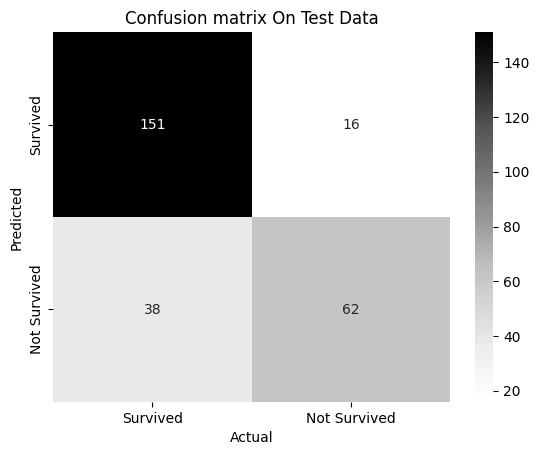

In [88]:
new_cm = pd.DataFrame(cm_xg , index = ['Survived','Not Survived'] , columns = ['Survived','Not Survived'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Survived','Not Survived'], yticklabels = ['Survived','Not Survived'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

#### Best parametres dans XGBoost

In [89]:
xg = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=1000, learning_rate=0.001, max_depth=7)
xg.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_test, y_test)], verbose=True)
best_iteration = xg.best_iteration
best_xg = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=best_iteration, learning_rate=0.001, max_depth=7)
best_xg.fit(X_train, y_train)
y_pred = best_xg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Meilleur nombre d'itérations :", best_iteration)
print("Meilleure précision :", accuracy)

[0]	validation_0-logloss:0.66126
[1]	validation_0-logloss:0.66082
[2]	validation_0-logloss:0.66039
[3]	validation_0-logloss:0.65995
[4]	validation_0-logloss:0.65952
[5]	validation_0-logloss:0.65909
[6]	validation_0-logloss:0.65866
[7]	validation_0-logloss:0.65824
[8]	validation_0-logloss:0.65782
[9]	validation_0-logloss:0.65739
[10]	validation_0-logloss:0.65697
[11]	validation_0-logloss:0.65654
[12]	validation_0-logloss:0.65612
[13]	validation_0-logloss:0.65570
[14]	validation_0-logloss:0.65528
[15]	validation_0-logloss:0.65487
[16]	validation_0-logloss:0.65445
[17]	validation_0-logloss:0.65403
[18]	validation_0-logloss:0.65362
[19]	validation_0-logloss:0.65321
[20]	validation_0-logloss:0.65279
[21]	validation_0-logloss:0.65238
[22]	validation_0-logloss:0.65197
[23]	validation_0-logloss:0.65156
[24]	validation_0-logloss:0.65115
[25]	validation_0-logloss:0.65074
[26]	validation_0-logloss:0.65033
[27]	validation_0-logloss:0.64993
[28]	validation_0-logloss:0.64952
[29]	validation_0-loglos

 ## SVM 📝

In [229]:
svm = SVC()
model_svm = svm.fit(X_train, y_train)
model_svm

SVC()

In [140]:
y_pred_svm = model_svm.predict(X_test)
ypred_svm_train = model_svm.predict(X_train)

In [141]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[155  12]
 [ 40  60]]


In [142]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       167
           1       0.83      0.60      0.70       100

    accuracy                           0.81       267
   macro avg       0.81      0.76      0.78       267
weighted avg       0.81      0.81      0.80       267



In [143]:
score_rf=accuracy_score(y_test,y_pred_svm)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 80.52%


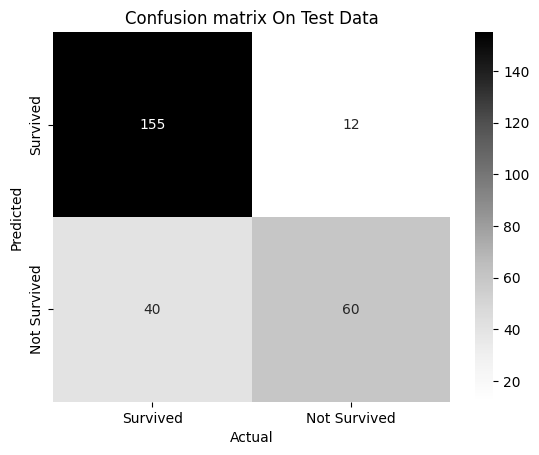

In [144]:
new_cm = pd.DataFrame(cm_svm , index = ['Survived','Not Survived'] , columns = ['Survived','Not Survived'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Survived','Not Survived'], yticklabels = ['Survived','Not Survived'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

### Score card 

In [156]:
df_scorecard = pd.DataFrame(columns = ['Model_name', 'Accuracy_Score_train', 'Precision_Score_train', 'Recall_Score_train', 'F1_Score_train', 'Accuracy_Score_test', 'Precision_Score_test', 'Recall_Score_test', 'F1_Score_test'])
df_scorecard

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test


In [157]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def score_card(d_f, model_name, y_pred, y_test, x_pred, y_train):
    metrics_dict = {
        'Model_name': model_name,
        'Accuracy_Score_train': accuracy_score(y_train, x_pred),
        'Precision_Score_train': precision_score(y_train, x_pred, average='macro'),
        'Recall_Score_train': recall_score(y_train, x_pred, average='macro'),
        'F1_Score_train': f1_score(y_train, x_pred, average='macro'),
        'Accuracy_Score_test': accuracy_score(y_test, y_pred),
        'Precision_Score_test': precision_score(y_test, y_pred, average='macro'),
        'Recall_Score_test': recall_score(y_test, y_pred, average='macro'),
        'F1_Score_test': f1_score(y_test, y_pred, average='macro')
    }

    dfx = pd.concat([d_f, pd.DataFrame(metrics_dict, index=[0])], ignore_index=True)
    return dfx

In [158]:
df101 = score_card(df_scorecard, 'Logistic Regression ', y_pred_lr, y_test, y_pred_lr__train, y_train)
df102 = score_card(df101, 'Decision Tree ', y_pred_dt, y_test, ypred_dt_train, y_train)
df103 = score_card(df102, 'KNN ', y_pred_knn, y_test, ypred_knn_train, y_train)
df104 = score_card(df103, 'XGBoost ', y_pred_xg, y_test, ypred_xg_train, y_train)
df105 = score_card(df104, 'SVM ', y_pred_svm, y_test, ypred_svm_train, y_train)
df105

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.802251,0.793824,0.784021,0.788050,0.786517,0.772276,0.771168,0.771709
1,Decision Tree,0.987138,0.988843,0.984108,0.986366,0.760300,0.745283,0.752216,0.747994
2,KNN,0.868167,0.865428,0.853949,0.858826,0.779026,0.764250,0.763174,0.763699
3,XGBoost,0.881029,0.901343,0.852803,0.867614,0.797753,0.796907,0.762096,0.772472
4,SVM,0.813505,0.845437,0.769175,0.783966,0.805243,0.814103,0.764072,0.777014


In [146]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1
887,1,1,0,19.0,0,0,30.0000,1
888,0,3,0,28.0,1,2,23.4500,1
889,1,1,1,26.0,0,0,30.0000,2


### Testing My Best Model on new sentences never seen before 🧪🔎

We will check with Decision Tree Model, because of its high performance

In [149]:
new_data = pd.DataFrame({
    'Pclass': [3, 1],
    'Sex': ['male', 'female'],
    'Age': [22.0, 70.0],
    'SibSp': [1, 1],
    'Parch': [0, 1],
    'Fare': [7.2500, 71.2833],
    'Embarked': ['S', 'C']
})
new_data['Sex'] = new_data['Sex'].replace({'male': 1, 'female': 0})
new_data['Embarked'] = new_data['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})
new_data['Age'].fillna(new_data['Age'].median(), inplace=True)
new_data['Embarked'].fillna(new_data['Embarked'].mode()[0], inplace=True)
modele_arbre_decision = DecisionTreeClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=10, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
new_data_scaled = scaler.transform(new_data)
modele_arbre_decision.fit(X_train_scaled, y_train)
predictions = modele_arbre_decision.predict(new_data_scaled)
for i, prediction in enumerate(predictions):
    print(f"Candidat {i + 1}: Survivant" if prediction == 1 else f"Candidat {i + 1}: Non survivant")


Candidat 1: Non survivant
Candidat 2: Survivant


![title](end1.jpg)